<img src="https://pad.gwdg.de/uploads/08e0f09e-ed2d-463f-8f92-e7ea3c661d18.png" width="40%">

# **Societal Challenges Datathon - Lecture 1**
#### 16 October 2024
<br>
Ann-Kathrin Edrich (edrich@mbd.rwth-aachen.de)<br>
Anna Simson (simson@mbd.rwth-aachen.de)<br>
Nazanin Bagherinejad (bagherinejad@mbd.rwth-aachen.de)<br>
<br>

In [3]:
import pandas as pd
import os
import numpy as np

## **1. Datasets**

Throughout this semester, we will be using the latest **National Health and Nutrition Examination Survey (NHANES)** dataset, which spans from **August 2021 to August 2023**. NHANES is a critical resource for understanding the health and nutritional status of the U.S. population. It is widely used for **public health research**, **policy-making**, and understanding trends in **chronic diseases**, **nutritional habits**, and **socioeconomic health disparities**.

You can find the complete dataset [here.]( https://wwwn.cdc.gov/Nchs/Nhanes/search/datapage.aspx?Component=Questionnaire&Cycle=2021-2023)

In [ ]:
path = '.'
files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(files)


['smoking_household_smokers.XPT', 'preventive_aspirin_use.XPT', 'sleep_disorders.XPT', 'functioning.XPT', 'housing_characteristics.XPT', 'lecture1_pandas-added.ipynb.ipynb', 'medical_conditions.XPT', 'blood_pressure_cholesterol.XPT', 'hospital_utilization_access_to_care.XPT', 'dermatology.XPT', 'mental_health_depression_screener.XPT', 'variables.csv', 'health_insurance.XPT', 'hepatitis.XPT', 'acculturation.XPT', 'occupation.XPT', 'kidney_condition_urology.XPT', 'oral_health.XPT', 'diet_behavior_nutrition.XPT', 'smoking_cigarette_use.XPT', 'early_childhood.XPT', 'immunization.XPT', 'income.XPT', 'prescription_medications.XPT', 'audiometry.XPT', 'diabetes.XPT', 'pesticide_use.XPT', 'physical_activity.XPT', 'weight_history.XPT', 'physical_activity_youth.XPT', 'smoking_recent_tobacco_use.XPT', 'alcohol_use.XPT', 'current_health_status.XPT']


- Acculturation
- Alcohol use
- Audiometry
- Blood pressure & Cholesterol
- Current Health Status
- Dermatology
- Diabetes
- Diet Behavior & Nutrition
- Early Childhood
- Functioning
- Health Insurance
- Hepatitis
- Hospital Utilization & Access to Care
- Housing Characteristics
- Immunization
- Income
- Kidney Conditions - Urology
- Medical Conditions
- Mental Health - Depression Screener
- Occupation
- Oral Health
- Pesticide Use
- Physical Activity
- Physical Activity - Youth
- Prescription Medications
- Preventive Aspirine Use
- Sleep Disorders
- Smoking - Cigarette Use
- Smoking - Household Smokers
- Smoking - Recent Tobacco Use
- Weight History

In [27]:
# Import exemplary dataset
path = './'



df = pd.read_sas(path + 'diabetes.XPT', format='xport')

print(df)

           SEQN  DIQ010
0      130378.0     2.0
1      130379.0     2.0
2      130380.0     1.0
3      130381.0     2.0
4      130382.0     2.0
...         ...     ...
11735  142306.0     2.0
11736  142307.0     1.0
11737  142308.0     2.0
11738  142309.0     2.0
11739  142310.0     2.0

[11740 rows x 2 columns]


In [13]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Directory con taining the .XPT files
data_dir = './'

# List of .XPT files for EDA
files_to_analyze = [
    'diabetes.XPT',
    'diet_behavior_nutrition.XPT',
    'pesticide_use.XPT',
    'alcohol_use.XPT',
    'mental_health_depression_screener.XPT',
    # ,'diabetes.XPT'
#     'blood_pressure_cholesterol.XPT',
#     'physical_activity.XPT',
#     'physical_activity_youth.XPT',
    'weight_history.XPT'
]



In [37]:


from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Placeholder for merged data
merged_data = None




# Loop through each file and merge based on SEQN
for file in files_to_analyze:
    file_path = os.path.join(data_dir, file)
    df = pd.read_sas(file_path, format='xport')
    
    # Ensure SEQN column exists for merging
    if 'SEQN' in df.columns:
        if merged_data is None:
            merged_data = df  # Initialize with the first DataFrame
        else:
            merged_data = pd.merge(merged_data, df, on='SEQN', how='outer')
    else:
        print(f"Warning: 'SEQN' column not found in {file}")

# Ensure merged_data is not empty

    # Select only the rows where DIQ010 == 0 or DIQ010 == 1
filtered_data = merged_data[(merged_data['DIQ010'] == 2) | (merged_data['DIQ010'] == 1)]

# Drop the SEQN column after merging



diabetic_df = filtered_data.drop(columns=['SEQN']).loc[filtered_data['DIQ010'] == 1]  # modified
non_diabetic_df = filtered_data.drop(columns=['SEQN']).loc[filtered_data['DIQ010'] == 2]  # modified
both_df = filtered_data.drop(columns=['SEQN'])
print(merged_data.head())

path = './'
import pandas as pd
variables_df = pd.read_csv(path + 'variables.csv', encoding='ISO-8859-1')
# print(variables_df.head())
variable_dict = dict(zip(variables_df['Variable Name'], variables_df['Renamed_variables']))

def hist(merged_data, var_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_data, x=var_name, hue='DIQ010', multiple='stack', palette={1: 'blue', 2: 'orange'})
    plt.xlabel(var_name)
    plt.ylabel('Count')
    plt.title('Histogram of ' + variable_dict[var_name] + ' with Hue' + variable_dict["DIQ010"] ) 
    
    # Ensure var_name column exists and contains valid data
    if var_name in merged_data.columns:
        unique_values = sorted(list(merged_data[var_name].dropna().unique()))
        if len(unique_values) > 2:
            plt.xlim(unique_values[0], unique_values[-3])
        else:
            plt.xlim(unique_values[0], unique_values[-1])
        print(unique_values)
        if len(unique_values) >= 3:
            third_largest_unique_value = unique_values[-3]
            print(third_largest_unique_value)
        else:
            print("Not enough unique values to find the third largest.")
        
        # Calculate and plot median, mode, and mean
        valid_values = merged_data[var_name][merged_data[var_name] <= third_largest_unique_value]

        median_val = valid_values.median()
        mode_val = valid_values.mode().iloc[0]
        mean_val = valid_values.mean()  
        plt.axvline(median_val, color='r', linestyle='--', label=f'Median: {median_val}')
        plt.axvline(mode_val, color='g', linestyle='-', label=f'Mode: {mode_val}')
        plt.axvline(mean_val, color='b', linestyle='-.', label=f'Mean: {mean_val}')
        
        # Add custom legend for hue values
        handles, labels = plt.gca().get_legend_handles_labels()
        hue_labels = {1: 'Diabetic', 2: 'Non-Diabetic'}
        for hue_value, hue_label in hue_labels.items():
            handles.append(plt.Line2D([0], [0], color=sns.color_palette()[hue_value-1], lw=4))
            labels.append(hue_label)
        
        plt.legend(handles, labels)
    else:
        print(f"{var_name} column not found in the merged data.")
    
    plt.show()
def pie_chart(merged_data,var_name):
    plt.figure(figsize=(8, 8))
    plt.legend()
    if var_name in merged_data.columns:
        data = merged_data[var_name].value_counts()
        plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of {var_name}')
        plt.show()
    else:
        print(f"{var_name} column not found in the merged data.")

def heatmap(merged_data,var1, var2):
    if var1 in merged_data.columns and var2 in merged_data.columns:
        plt.figure(figsize=(10, 8))
        correlation_matrix = merged_data[[var1, var2]].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
        plt.title(f'Heatmap between {var1} and {var2}')
        plt.show()
    else:
        print(f"One or both variables {var1} and {var2} not found in the merged data.")


# Plot withvar_nameon x-axis

# Plot with WHD010 on x-axis


# Example dictionary for column code meanings
# Read the variables.csv file

# Print the value of column A where the value of column B is "key"


       SEQN  DIQ010  DBQ010  DBD030  DBD041  DBD050  DBD055  DBD061  DBQ073A  \
0  130378.0     2.0     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
1  130379.0     2.0     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
2  130380.0     1.0     NaN     NaN     NaN     NaN     NaN     NaN      NaN   
3  130381.0     2.0     1.0   273.0   273.0   456.0   212.0   395.0     10.0   
4  130382.0     2.0     1.0    91.0    91.0   365.0   365.0   425.0      NaN   

   DBQ073B  ...        DPQ050        DPQ060        DPQ070        DPQ080  \
0      NaN  ...           NaN           NaN           NaN           NaN   
1      NaN  ...  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2      NaN  ...  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3      NaN  ...           NaN           NaN           NaN           NaN   
4      NaN  ...           NaN           NaN           NaN           NaN   

         DPQ090        DPQ100  WHD010  WHD020  WHD050  WHQ070  
0   

/tmp/ipykernel_6432/293658016.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


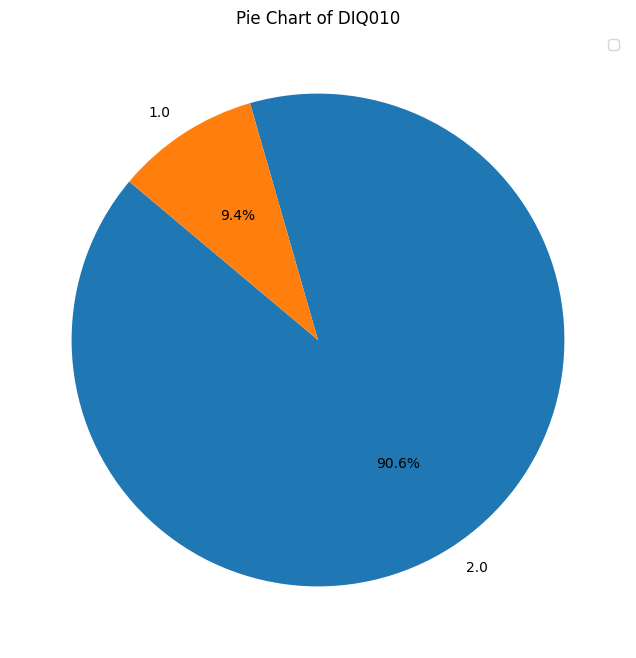

[np.float64(40.0), np.float64(42.0), np.float64(48.0), np.float64(51.0), np.float64(53.0), np.float64(54.0), np.float64(55.0), np.float64(56.0), np.float64(57.0), np.float64(58.0), np.float64(59.0), np.float64(60.0), np.float64(61.0), np.float64(62.0), np.float64(63.0), np.float64(64.0), np.float64(65.0), np.float64(66.0), np.float64(67.0), np.float64(68.0), np.float64(69.0), np.float64(70.0), np.float64(71.0), np.float64(72.0), np.float64(73.0), np.float64(74.0), np.float64(75.0), np.float64(76.0), np.float64(77.0), np.float64(78.0), np.float64(79.0), np.float64(80.0), np.float64(81.0), np.float64(82.0), np.float64(83.0), np.float64(7777.0), np.float64(9999.0)]
83.0


/home/dhruv/datathon/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


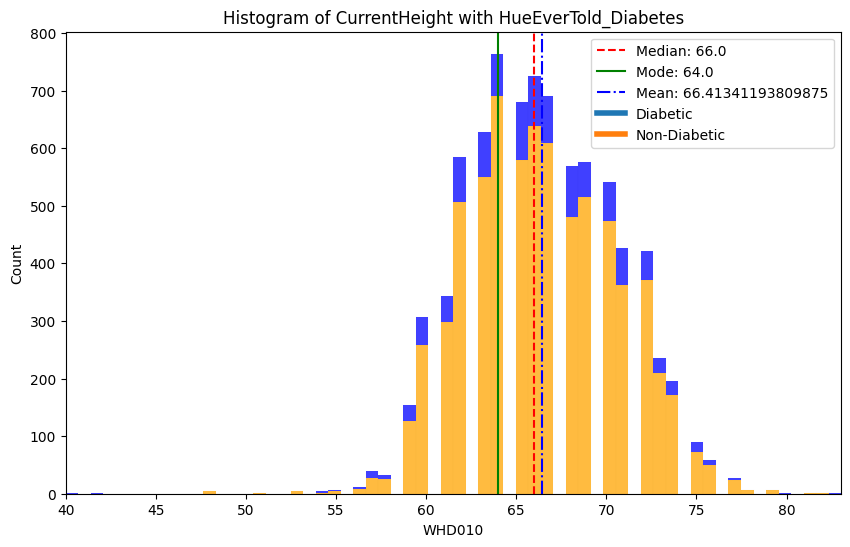

[np.float64(63.0), np.float64(70.0), np.float64(72.0), np.float64(75.0), np.float64(79.0), np.float64(80.0), np.float64(84.0), np.float64(85.0), np.float64(86.0), np.float64(88.0), np.float64(89.0), np.float64(90.0), np.float64(92.0), np.float64(93.0), np.float64(94.0), np.float64(95.0), np.float64(96.0), np.float64(97.0), np.float64(98.0), np.float64(99.0), np.float64(100.0), np.float64(101.0), np.float64(102.0), np.float64(103.0), np.float64(104.0), np.float64(105.0), np.float64(106.0), np.float64(107.0), np.float64(108.0), np.float64(109.0), np.float64(110.0), np.float64(111.0), np.float64(112.0), np.float64(113.0), np.float64(114.0), np.float64(115.0), np.float64(116.0), np.float64(117.0), np.float64(118.0), np.float64(119.0), np.float64(120.0), np.float64(121.0), np.float64(122.0), np.float64(123.0), np.float64(124.0), np.float64(125.0), np.float64(126.0), np.float64(127.0), np.float64(128.0), np.float64(129.0), np.float64(130.0), np.float64(131.0), np.float64(132.0), np.float64(1

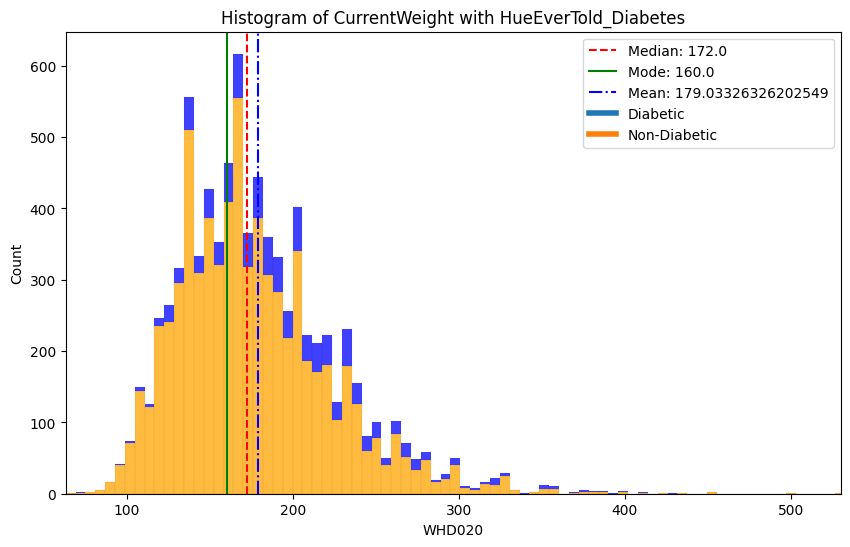

[np.float64(67.0), np.float64(79.0), np.float64(80.0), np.float64(82.0), np.float64(87.0), np.float64(88.0), np.float64(89.0), np.float64(90.0), np.float64(92.0), np.float64(93.0), np.float64(94.0), np.float64(95.0), np.float64(96.0), np.float64(97.0), np.float64(98.0), np.float64(99.0), np.float64(100.0), np.float64(101.0), np.float64(102.0), np.float64(103.0), np.float64(104.0), np.float64(105.0), np.float64(106.0), np.float64(107.0), np.float64(108.0), np.float64(109.0), np.float64(110.0), np.float64(111.0), np.float64(112.0), np.float64(113.0), np.float64(114.0), np.float64(115.0), np.float64(116.0), np.float64(117.0), np.float64(118.0), np.float64(119.0), np.float64(120.0), np.float64(121.0), np.float64(122.0), np.float64(123.0), np.float64(124.0), np.float64(125.0), np.float64(126.0), np.float64(127.0), np.float64(128.0), np.float64(129.0), np.float64(130.0), np.float64(131.0), np.float64(132.0), np.float64(133.0), np.float64(134.0), np.float64(135.0), np.float64(136.0), np.float

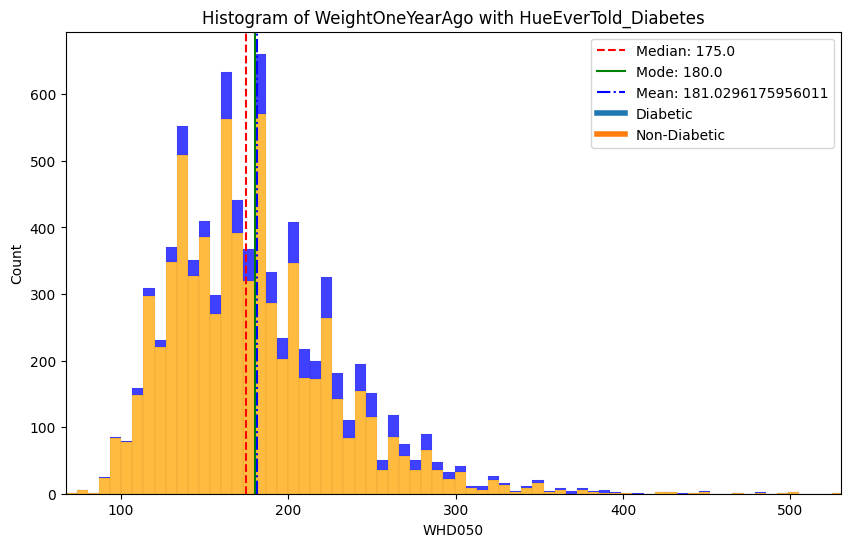

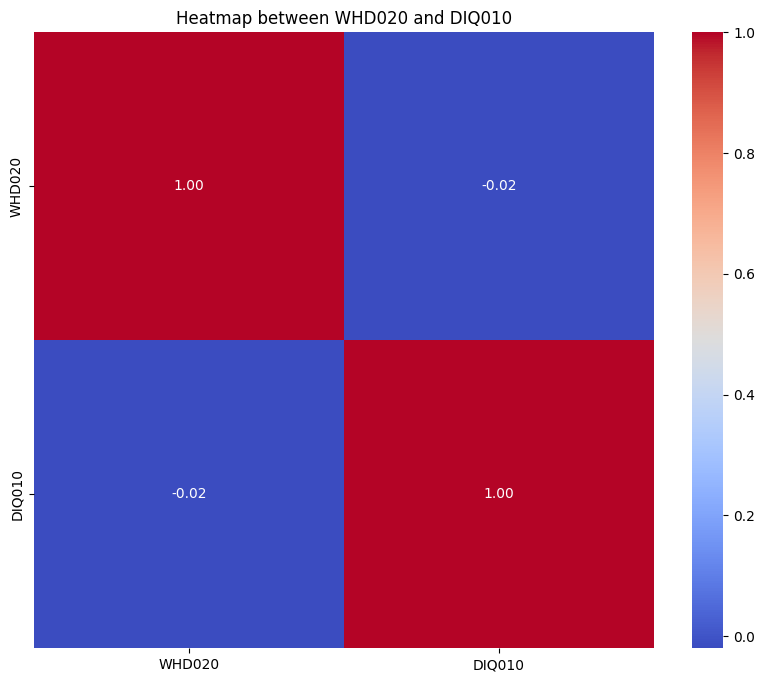

In [38]:
pie_chart(both_df,'DIQ010')
hist(both_df,'WHD010')
hist(both_df,'WHD020')
hist(both_df,'WHD050')
heatmap(both_df,'WHD020', 'DIQ010')

In [39]:


def save_dict( df ,filename):
    df.rename(columns=variable_dict, inplace=True)
    df.to_csv(filename + '.csv', index=False)
    print(df.head())

save_dict(both_df, 'both_df')
save_dict(diabetic_df, 'diabetic_df')
save_dict(non_diabetic_df, 'non_diabetic_df')

   EverTold_Diabetes  EverBreastfed  AgeStoppedBreastfeeding  \
0                2.0            NaN                      NaN   
1                2.0            NaN                      NaN   
2                1.0            NaN                      NaN   
3                2.0            1.0                    273.0   
4                2.0            1.0                     91.0   

   AgeFirstFedFormula  AgeStoppedDrinkingFormula  \
0                 NaN                        NaN   
1                 NaN                        NaN   
2                 NaN                        NaN   
3               273.0                      456.0   
4                91.0                      365.0   

   AgeFirstFedOtherThanBreastMilk_inDays  AgeFirstFedMilk  \
0                                    NaN              NaN   
1                                    NaN              NaN   
2                                    NaN              NaN   
3                                  212.0            395.0 

[More information on the variable names and values for "Audiometry.XPT"](https://wwwn.cdc.gov/Nchs/Nhanes/2021-2022/AUQ_L.htm])

In [7]:
# Import variables
with open('./variables.csv', mode='r', encoding='utf-8', errors='replace') as f:
    df_vars = pd.read_csv(f)

print(df_vars.head())

  Variable Name                               Variable Description  \
0        AUQ054  These next questions are about {your/SP's} hea...   
1        AUQ101  How often {do you/does SP} have difficulty hea...   
2        AUQ144  A hearing test by a specialist is one that is ...   
3       AUQ410A  What are the main causes of {your/SP's} hearin...   
4       AUQ410B  What are the main causes of {your/SP's} hearin...   

                       Renamed_variables Data File Name Data File Description  \
0                    HearingStatus_NoAid          AUQ_L            Audiometry   
1  DifficultyHearing_WithBackgroundNoise          AUQ_L            Audiometry   
2             LastHearingTest_Specialist          AUQ_L            Audiometry   
3                  reason_hearing_loss_A          AUQ_L            Audiometry   
4                  reason_hearing_loss_B          AUQ_L            Audiometry   

   Begin Year  EndYear      Component Use Constraints Unnamed: 9  
0        2021     2023  Q

## **2. Basics of Pandas**

In [8]:
df_smoke = pd.read_sas(path + 'smoking_cigarette_use.XPT', format='xport')
df_smoke.head()

,SEQN,SMQ020,SMQ040,SMD641,SMD650,SMD100MN,SMQ621,SMD630,SMAQUEX2
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### **2.1 Selecting columns and rows**

In [9]:
# Select a single column
df_smoke['SEQN']

# Select multiple columns
df_smoke[['SEQN', 'SMQ020']]

# Select a row by index
df_smoke.loc[1]

# Filter rows
df_smoke[df_smoke['SMQ020'] > 3]

df_vars[(df_vars['Variable Name'].isin(df_smoke.columns)) & (df_vars['Data File Name'] == 'SMQ_L')]

,Variable Name,Variable Description,Renamed_variables,Data File Name,Data File Description,Begin Year,EndYear,Component,Use Constraints,Unnamed: 9
210,SEQN,Respondent sequence number.,sequence_no,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
211,SMAQUEX2,Questionnaire Mode Flag,QuestionnaireModeFlag,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
212,SMD100MN,Do you usually smoke menthol or non-menthol ci...,SmokingTypeMenthol,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
213,SMD630,How old were you when you smoked a whole cigar...,FirstCigaretteAge,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
214,SMD641,On how many of the past 30 days did {you/SP} s...,CigarettesSmokedDays_30Days,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
215,SMD650,"During the past 30 days, on the days that {you...",CigarettesPerDayOnSmokingDays_30Days,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
216,SMQ020,These next questions are about cigarette smoki...,SmokedAtLeast100CigarettesInLife,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
217,SMQ040,{Do you/Does SP} now smoke cigarettes?,CurrentCigaretteSmoking,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN
218,SMQ621,The following questions are about cigarette sm...,TotalCigarettesSmoked,SMQ_L,Smoking - Cigarette Use,2021,2023,Questionnaire,NaN,NaN


In [10]:
relevant_rows = df_vars[(df_vars['Variable Name'].isin(df_smoke.columns)) & (df_vars['Data File Name'] == 'SMQ_L')]

# Loop through the filtered rows and replace column names
df_smoke = df_smoke.rename(columns=dict(zip(relevant_rows['Variable Name'], relevant_rows['Renamed_variables'])))

df_smoke.head()


,sequence_no,SmokedAtLeast100CigarettesInLife,CurrentCigaretteSmoking,CigarettesSmokedDays_30Days,CigarettesPerDayOnSmokingDays_30Days,SmokingTypeMenthol,TotalCigarettesSmoked,FirstCigaretteAge,QuestionnaireModeFlag
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [11]:
df_smoke['csd_30'] = np.where(df_smoke['CigarettesSmokedDays_30Days'] < 31, df_smoke['CigarettesSmokedDays_30Days'], np.nan)

df_smoke

,sequence_no,SmokedAtLeast100CigarettesInLife,CurrentCigaretteSmoking,CigarettesSmokedDays_30Days,CigarettesPerDayOnSmokingDays_30Days,SmokingTypeMenthol,TotalCigarettesSmoked,FirstCigaretteAge,QuestionnaireModeFlag,csd_30
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
9010,142305.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9011,142307.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9012,142308.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
9013,142309.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


### **2.2 Group By**

In [12]:
grouped = df_smoke.groupby('SmokedAtLeast100CigarettesInLife')['sequence_no'].count()
grouped

SmokedAtLeast100CigarettesInLife
1.0    3243
2.0    4878
7.0       7
9.0       7
Name: sequence_no, dtype: int64

In [13]:
grouped2 = df_smoke.groupby(['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking']).size()
grouped2

SmokedAtLeast100CigarettesInLife  CurrentCigaretteSmoking
1.0                               1.0                         952
                                  2.0                         238
                                  3.0                        2053
dtype: int64

In [14]:
grouped3 = df_smoke.groupby(['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking'])['csd_30'].mean()
grouped3

SmokedAtLeast100CigarettesInLife  CurrentCigaretteSmoking
1.0                               1.0                        30.000000
                                  2.0                        10.948498
                                  3.0                              NaN
Name: csd_30, dtype: float64

In [15]:
grouped4 = df_smoke.groupby(['SmokedAtLeast100CigarettesInLife', 'CurrentCigaretteSmoking']).agg({
    'csd_30': ['mean', 'count'],
})
grouped4

csd_30      
                                                               mean count
SmokedAtLeast100CigarettesInLife CurrentCigaretteSmoking                 
1.0                              1.0                      30.000000    12
                                 2.0                      10.948498   233
                                 3.0                            NaN     0

### **2.3 Merging Dataframes**

- Inner join
- Outer join
- Left join
- Right join

In [25]:
# Inner Join: only rows with matching seq number will be kept
df_inner = pd.merge(df_smoke, df, left_on='sequence_no', right_on='SEQN', how='inner')
df_inner

,sequence_no,SmokedAtLeast100CigarettesInLife,CurrentCigaretteSmoking,CigarettesSmokedDays_30Days,CigarettesPerDayOnSmokingDays_30Days,SmokingTypeMenthol,TotalCigarettesSmoked,FirstCigaretteAge,QuestionnaireModeFlag,csd_30,...,AUQ410C,AUQ410D,AUQ410E,AUQ410F,AUQ410G,AUQ410H,AUQ410I,AUQ410J,AUQ144,AUQ101
0,130378.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
1,130379.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,9.0,NaN,1.0,3.0
2,130380.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,2.0,1.0
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,142305.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0
9011,142307.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0
9012,142308.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0
9013,142309.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0


### **2.4 Saving the dataframe**

In [29]:
# Save the DataFrame to a CSV file
df_smoke.to_csv('df_smoke.csv', index=False)

## **3. Task suggestions** (without specific order)

- Familiarize yourself with the source of the datasets. Assess the general trustworthiness of the source.
- Consider which and how many datasets you want to combine that are meaningful for the prediction task
- Combine the datasets. Remember that all datasets contain different IDs!
- Replace column labels with human understandable variables.
- Get an overview of the available data. Perform a EDA and try to understand what the relationships actually mean. When in doubt, use common knowledge and scientific resources to assess whether contained data might be faulty.
- Which features have a correlation to diabetes occurrence?
- Set up a gitlab/github project to work with.
- For the moment do not worry about missing values, we will talk about that during our next meeting.

Make sure that you are equipped next madatory meeting to talk about your findings, prepare figures to show the results of the EDA and be ready to explain how and why you combined the datasets you chose.

FileNotFoundError: [Errno 2] No such file or directory: 'dataset1.csv'